In [1]:
import tensorflow as tf

In [2]:
tf.enable_eager_execution()

In [3]:
tf.add(1, 2).numpy()

3

In [4]:
hello = tf.constant('Hello, TensorFlow!')

In [5]:
hello.numpy()

'Hello, TensorFlow!'

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas de ajuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [7]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
class_names

[u'T-shirt/top',
 u'Trouser',
 u'Pullover',
 u'Dress',
 u'Coat',
 u'Sandal',
 u'Shirt',
 u'Sneaker',
 u'Bag',
 u'Ankle boot']

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
len(train_labels)

60000

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
len(test_labels)

10000

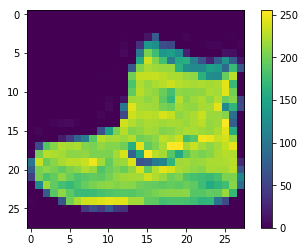

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
train_images = train_images / 255.0

test_images = test_images / 255.0

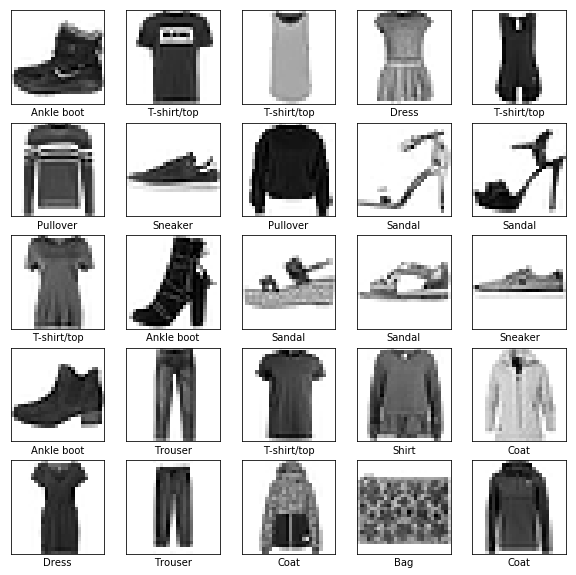

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.fit(train_images, train_labels, epochs=5)

W0809 17:45:11.153527 4492584384 deprecation.py:323] From /Users/robertolima/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/math_grad.py:1250: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.4987 - acc: 0.82522s - loss: 0.6660 - acc: 0. - ETA: 2s - loss: 0.6278 -  - ETA: 1s - loss: 0.5578 -  - ETA: 0s - loss: 0.5237 - acc: - ETA: 0s - loss: 0.5081 - acc: 0
Epoch 2/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3761 - acc: 0.86472s - loss: 0.3900 - acc - ETA: 1s - loss: 0.3867 - acc: 0 - ETA: 1s - loss: 0.3859 - ETA: 1s - loss: 
Epoch 3/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3362 - acc: 0.87632s - loss: 0.3401 - acc: - ETA: 1s - loss: 0.3364 - ac - ETA: 1s - loss: 0.3401 - acc:  - ETA: 1s - loss: 0.3412 - acc: 0.8 - ETA: 0s - loss: 0.3423 -  - ETA: 0s - loss: 0.3383 - acc: 
Epoch 4/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3137 - acc: 0.8855
Epoch 5/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2965 - acc: 0.8906


In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.3706 - acc: 0.8672
Test accuracy: 0.8672


In [22]:
predictions = model.predict(test_images)

In [23]:
predictions[0]

array([6.7478722e-06, 4.4757147e-07, 4.0946239e-07, 2.0723017e-07,
       3.5172009e-06, 3.4446013e-03, 3.9370798e-06, 1.9651279e-01,
       3.3442910e-05, 7.9999387e-01], dtype=float32)

In [24]:
np.argmax(predictions[0])

9

In [25]:
test_labels[0]

9

In [26]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

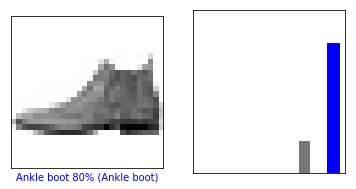

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

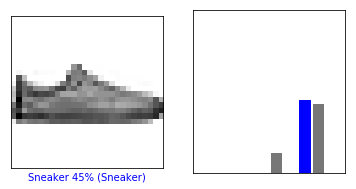

In [28]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

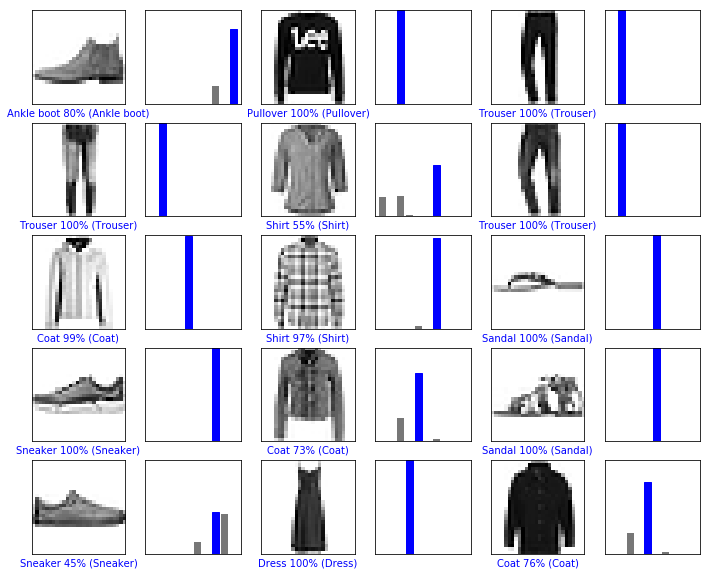

In [29]:
# Criar o gráfico das primeiras X imagens, o label previsto e o label correto
# Colorir as previsões corretas a azul e as incorretas a vermelho
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [34]:
# Escolha uma imagem dos dados de teste
img = test_images[0]

print(img.shape)

(28, 28)


In [35]:
# Adicione a imagem a batch onde é o único membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [36]:
predictions_single = model.predict(img)

print(predictions_single)

[[6.7478722e-06 4.4757275e-07 4.0946239e-07 2.0722976e-07 3.5172009e-06
  3.4446046e-03 3.9370761e-06 1.9651274e-01 3.3442971e-05 7.9999387e-01]]


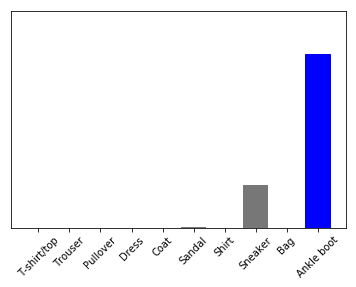

In [37]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [38]:
np.argmax(predictions_single[0])

9